In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark

# New section

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark.conf.set("spark.sql.caseSensitive", True) # Avoid error "Found duplicate column(s) in the data schema"
spark

In [ ]:
myreview = spark.read.json("Sports_and_Outdoors_5.json")
myreview

asin,image,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
0000032034,null,5.0,What a spectacula...,"06 3, 2015",A180LQZBUWVOLF,Michelle A,null,Five Stars,1433289600,true,null
0000032034,null,1.0,What the heck? Is...,"04 1, 2015",ATMFGKU5SVEYY,Crystal R,null,Is this a tutu fo...,1427846400,true,null
0000032034,null,5.0,Exactly what we w...,"01 13, 2015",A1QE70QBJ8U6ZG,darla Landreth,null,Five Stars,1421107200,true,null
0000032034,null,5.0,I used this skirt...,"12 23, 2014",A22CP6Z73MZTYU,L. Huynh,null,I liked that the ...,1419292800,true,null
0000032034,null,4.0,This is thick eno...,"12 15, 2014",A22L28G8NRNLLN,McKenna,null,This is thick eno...,1418601600,true,null
0899332757,null,5.0,Already have an A...,"07 5, 2008",A5N0QU8JBRVQQ,Amazon Customer,"{null, null, null...",I love maps,1215216000,true,null
0899332757,null,5.0,So cool,"02 7, 2017",ANGLIGXJHXC6D,Amazon Customer,"{null, null, null...",So cool,1486425600,false,null
0899332757,null,5.0,Arrived on time. ...,"12 27, 2016",ASAE9FBGAJQAH,Joseph Micallef,"{null, null, null...",Nice Atlas - Easy...,1482796800,true,null
0899332757,null,3.0,More of a road ma...,"12 12, 2016",A1TAW91SQSU2AH,jordan s moore,"{null, null, null...",Mostly a road atl...,1481500800,true,null
0899332757,null,5.0,Comprehensive atl...,"08 13, 2016",A1SVGO4GMEOXQ0,Gregory Mahnken,"{null, null, null...",Very happy with h...,1471046400,true,null


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
myreview_column=myreview.select('asin')
unique_asin=myreview_column.distinct()
unique_asin

asin
B00012O8B4
B00014CD1E
B0001WC726
B000221GY0
B000237JVS
B00029AOHS
B0002U4HU2
B0007U010W
B0009FUAW4
B0009GUZZK


In [ ]:
unique_asin_count=myreview_column.distinct().count()
print("Number of unique ASIN values:", unique_asin_count)

Number of unique ASIN values: 93389


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("JSON to CSV Conversion").getOrCreate()

# Read the JSON data
myreview = spark.read.json("Sports_and_Outdoors_5.json")

# Show the DataFrame (optional)
myreview.show()

# Define the output file path for the CSV file
output_file_path = "myreview.csv"

# Write the DataFrame to CSV
# Note: The 'header' option is set to 'true' to include the column names in the CSV file.
myreview.write.option("header", "true").csv(output_file_path)

# Stop the SparkSession
spark.stop()



ModuleNotFoundError: ignored

In [ ]:
# More operations are available from Spark's SQL functions
from pyspark.sql import functions as f

In [ ]:
mydata=myreview.withColumn(
    "sentiments",
    f.when((f.col("overall")>=4),"positive")
    .when((f.col("overall")<=2),"negative")
)

In [ ]:
mydata = (mydata
          #Remove handles
          .withColumn("reviewText", f.regexp_replace(f.col("reviewText"), "@[\w]*", ""))
          #Remove special characters
          .withColumn("reviewText", f.regexp_replace(f.col("reviewText"), "[^a-zA-Z']", " "))
          #Remove leading and trailing whitespaces
          .withColumn("reviewText", f.trim(f.col("reviewText")))
          #Restrict the length of the string
          .filter(f.length("reviewText")>50)
          )

mydata.show(5)

+----------+-----+-------+--------------------+-----------+--------------+---------------+--------------------+--------------------+--------------+--------+----+----------+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|   reviewerName|               style|             summary|unixReviewTime|verified|vote|sentiments|
+----------+-----+-------+--------------------+-----------+--------------+---------------+--------------------+--------------------+--------------+--------+----+----------+
|0000032034| null|    1.0|What the heck  Is...| 04 1, 2015| ATMFGKU5SVEYY|      Crystal R|                null|Is this a tutu fo...|    1427846400|    true|null|  negative|
|0000032034| null|    5.0|I used this skirt...|12 23, 2014|A22CP6Z73MZTYU|       L. Huynh|                null|I liked that the ...|    1419292800|    true|null|  positive|
|0000032034| null|    4.0|This is thick eno...|12 15, 2014|A22L28G8NRNLLN|        McKenna|                null|This is thick eno...|   

In [ ]:
mydataPos = mydata.filter("sentiments= 'positive'")

# Get the negative ones
mydataNeg = mydata.filter("sentiments = 'negative'")

mydataPossample = mydataPos.sample(fraction=500000/mydataPos.count(), seed=9165)

# Get a random sample from negative
mydataNegsample = mydataNeg.sample(fraction=100000/mydataNeg.count(), seed=9165)

In [ ]:
mysample = mydataPossample.union(mydataNegsample)

In [ ]:
#mysample.groupBy("sentiments").count()

In [ ]:
(training, test) = mysample.randomSplit([0.8, 0.2],seed = 9165)

In [ ]:
#training.groupBy("sentiments").count()

In [ ]:
#test.groupBy("sentiments").count()

In [ ]:
# More operations are available from Spark's SQL functions
from pyspark.sql import functions as f

# Use nickname feat for the subpackage
import pyspark.ml.feature as feat

# We need Pipeline to streamline the workflow
from pyspark.ml import Pipeline

# Use logistic regression
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, NaiveBayes

# Import an evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Additional functions for tuning parameters
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='reviewText_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='reviewText_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='features'
    , vocabSize=3000
)



# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "sentiments"
    , outputCol = "label"
)


# Logistic regression model
lr = LogisticRegression(
    maxIter=100
)


# Finally set up the pipline
sentiments_pipeline_bow = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , label_string
            , lr
            ]
)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lrModel = sentiments_pipeline_bow.fit(training)
lr_prediction = lrModel.transform(test)
lr_prediction.select("prediction", "sentiments", "features").show(50)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

+----------+----------+--------------------+
|prediction|sentiments|            features|
+----------+----------+--------------------+
|       0.0|  positive|(3000,[9,56,186,2...|
|       0.0|  positive|(3000,[13,30,34,7...|
|       0.0|  positive|(3000,[1,5,8,14,3...|
|       0.0|  positive|(3000,[0,2,8,20,8...|
|       0.0|  positive|(3000,[0,12,34,16...|
|       0.0|  positive|(3000,[4,8,9,14,1...|
|       0.0|  positive|(3000,[5,19,176,2...|
|       0.0|  positive|(3000,[28,58,69,1...|
|       0.0|  positive|(3000,[0,3,5,6,12...|
|       0.0|  positive|(3000,[15,44,61,9...|
|       0.0|  positive|(3000,[0,1,9,13,2...|
|       0.0|  positive|(3000,[0,3,9,12,5...|
|       0.0|  positive|(3000,[2,3,12,14,...|
|       0.0|  positive|(3000,[0,3,5,9,16...|
|       0.0|  positive|(3000,[0,3,10,13,...|
|       0.0|  positive|(3000,[5,11,18,32...|
|       0.0|  positive|(3000,[0,2,5,11,1...|
|       0.0|  positive|(3000,[0,8,46,158...|
|       0.0|  positive|(3000,[8,12,16,17...|
|       0.

In [ ]:
lr_accuracy = evaluator.evaluate(lr_prediction)
print("Accuracy of this Logistic Regression model with bag-of-words approach is %g"% (lr_accuracy))

Accuracy of this Logistic Regression model with bag-of-words approach is 0.913987


In [ ]:
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='reviewText_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='reviewText_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='features'
    , vocabSize=3000
    , minDF=0.05
)



# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "sentiments"
    , outputCol = "label"
)


# Logistic regression model
lr = LogisticRegression(
    maxIter=100
)


# Finally set up the pipline
sentiments_pipeline_bow = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , label_string
            , lr
            ]
)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lrModel = sentiments_pipeline_bow.fit(training)
lr_prediction = lrModel.transform(test)
lr_prediction.select("prediction", "sentiments", "features").show(50)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

+----------+----------+--------------------+
|prediction|sentiments|            features|
+----------+----------+--------------------+
|       0.0|  positive|      (56,[9],[1.0])|
|       0.0|  positive|(56,[13,30,34],[1...|
|       0.0|  positive|(56,[1,5,8,14,37,...|
|       0.0|  positive|(56,[0,2,8,20],[2...|
|       0.0|  positive|(56,[0,12,34],[1....|
|       0.0|  positive|(56,[4,8,9,14,18,...|
|       0.0|  positive|(56,[5,19],[1.0,1...|
|       0.0|  positive|     (56,[28],[1.0])|
|       0.0|  positive|(56,[0,3,5,6,12,1...|
|       0.0|  positive|(56,[15,43],[1.0,...|
|       0.0|  positive|(56,[0,1,9,13,22,...|
|       0.0|  positive|(56,[0,3,9,12],[3...|
|       0.0|  positive|(56,[2,3,12,14,15...|
|       0.0|  positive|(56,[0,3,5,9,16,1...|
|       0.0|  positive|(56,[0,3,10,13,14...|
|       0.0|  positive|(56,[5,11,18,32],...|
|       0.0|  positive|(56,[0,2,5,11,12,...|
|       0.0|  positive|(56,[0,8,45],[1.0...|
|       0.0|  positive|(56,[8,12,16,17,3...|
|       0.

In [ ]:
lr_accuracy = evaluator.evaluate(lr_prediction)
print("Accuracy of this Logistic Regression model with bag-of-words approach is %g"% (lr_accuracy))

Accuracy of this Logistic Regression model with bag-of-words approach is 0.83796


In [ ]:
# Build up the pipeline/workflow for Logistic Regression

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
    , minDocFreq=500
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "sentiments"
    , outputCol = "label"
)

# Logistic Regression model
lr = LogisticRegression(
    maxIter=100
)


# Finally set up the pipline
sentiment_pipeline_idf_lr = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , lr
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(count_vec.vocabSize, [3000, 5000]) \
          .addGrid(lr.regParam, [0.1, 5]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_lr,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

Model parameters: vocabSize=3000 regParam=0.1 has average accuracy: 0.887244602656408
Model parameters: vocabSize=3000 regParam=5.0 has average accuracy: 0.8337025014832848
Model parameters: vocabSize=5000 regParam=0.1 has average accuracy: 0.8875617855229718
Model parameters: vocabSize=5000 regParam=5.0 has average accuracy: 0.833706660930747


In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Logistic Regression model with the test data is %g"% (cv_accuracy))

Accuracy of the best Logistic Regression model with the test data is 0.886076


In [ ]:
# Build up the pipeline/workflow for Naive Bayes

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
    , minDocFreq=5
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "sentiments"
    , outputCol = "label"
)

# Naive Bayes model
nb = NaiveBayes(
)


# Finally set up the pipline
sentiment_pipeline_idf_nb = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , nb
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(count_vec.vocabSize, [3000, 5000]) \
          .addGrid(nb.smoothing, [1, 0]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_nb,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

Model parameters: vocabSize=3000 smoothing=1.0 has average accuracy: 0.8665870390965359
Model parameters: vocabSize=3000 smoothing=0.0 has average accuracy: 0.8665661348532346
Model parameters: vocabSize=5000 smoothing=1.0 has average accuracy: 0.8676832201849127
Model parameters: vocabSize=5000 smoothing=0.0 has average accuracy: 0.8676830694295485


In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Naive Bayes model with the test data is %g"% (cv_accuracy))

Accuracy of the best Naive Bayes model with the test data is 0.866811


In [ ]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import length

In [ ]:
# Define the hyperparameters
vocab_size = 10000 # Number of unique words in the vocabulary
embedding_dim = 100 # Dimensionality of the word embeddings
max_length = 100 # Maximum length of each input sequence
lstm_units = 64 # Number of LSTM units in the model
dropout_rate = 0.2 # Dropout rate to reduce overfitting


In [ ]:
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
lstm_model.add(LSTM(units=lstm_units))
lstm_model.add(Dropout(dropout_rate))
lstm_model.add(Dense(1, activation='sigmoid'))


# Define the pipeline stages for data preprocessing
tokenizer = Tokenizer(inputCol='reviewText', outputCol='words')
min_length = 10
length_filter = (length(tokenizer.getOutputCol()) >= min_length)
filtered_df = df.filter(length_filter) # define or assign a DataFrame to `filtered_df`
filtered_df = filtered_df.select('reviewText', 'sentiments')
label_string = feat.StringIndexer(inputCol='sentiments', outputCol='label')
tokenizer = Tokenizer(inputCol='reviewText', outputCol='words')
count_vec = feat.CountVectorizer(inputCol='words', outputCol='raw_features')
idf_cal = feat.IDF(inputCol='raw_features', outputCol='features')
tokenizer_and_stopword_remover = Pipeline(stages=[tokenizer, sw_remover])

# Define the final pipeline
lstm_pipeline = Pipeline(stages=[tokenizer_and_stopword_remover, count_vec, idf_cal, label_string])

# Fit the pipeline to the data
pipeline_model = lstm_pipeline.fit(filtered_df)
transformed_df = pipeline_model.transform(filtered_df)



NameError: ignored

In [ ]:
# Split the data into training and testing sets
(training_data, test_data) = transformed_df.randomSplit([0.8, 0.2], seed=1234)

NameError: ignored

In [ ]:
# Convert the training data to a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((training_data.select('features'), training_data.select('label')))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [ ]:

lstm_model.fit(train_dataset, epochs=num_epochs, batch_size=batch_size)

# Evaluate the model on the test data
test_dataset = tf.data.Dataset.from_tensor_slices((test_data.select('features'), test_data.select('label')))
results = lstm_model.evaluate(test_dataset, batch_size=batch_size)
print('Test accuracy:', results[1])


In [ ]:
# Build up the pipeline/workflow for Naive Bayes

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
    , vocabSize=5000
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "sentiments"
    , outputCol = "label"
)

# Naive Bayes model
rf = RandomForestClassifier(
    featuresCol='features',
    labelCol='label',
    numTrees=100,
    maxDepth=4
)


# Finally set up the pipline
sentiment_pipeline_idf_rf = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , rf
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(idf_cal.minDocFreq, [5, 10]) \
          .addGrid(rf.numTrees, [20, 40]) \
          .addGrid(rf.maxDepth, [5, 4]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_rf,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

NameError: ignored

In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Random Forest model with the test data is %g"% (cv_accuracy))

Accuracy of the best Random Forest model with the test data is 0.861403


In [ ]:
import gzip
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords
import pandas as pd

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

# First upload a review data set to the runtime

# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 100000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('Cell_Phones_and_Accessories_5.json', nrows=10000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myData = pd.concat(myList,axis=0)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Make sure the column 'reviewText' is of string type
myData['reviewText'] = myData['reviewText'].apply(str)
# Remove special characters
myData['clean_review'] = myData['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myData['clean_review'] = myData['clean_review'].str.strip()

In [ ]:

def getSentCat(text):
  myScore = sia.polarity_scores(text)['compound']
  if myScore > 0:
    myCat = 'positive'
  elif myScore < 0:
    myCat = 'negative'
  else:
    myCat = 'neutral'
  return(myCat)

In [ ]:
myData['sentiment_cat'] = myData.apply(lambda x: getSentCat(x['clean_review']), axis=1)

In [ ]:
myData.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,clean_review,sentiment_cat
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,Looks even better in person Be careful to not...,positive
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,When you don't want to spend a whole lot of ca...,positive
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,so the case came on time i love the design I...,positive
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,DON'T CARE FOR IT GAVE IT AS A GIFT AND THEY...,positive
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,I liked it because it was cute but the studs ...,positive


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# Subset the data
myDataPos = myData[myData['sentiment_cat']=='positive']
# Take the reviews
myReviewPos = myDataPos['clean_review']
# Make a single string
all_review_pos = ' '.join(myReviewPos)
# Break to words
myWordsPos = word_tokenize(all_review_pos)
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringPos = " ".join(myWordsPos_noSW_noCase)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = myData[myData['sentiment_cat']=='negative']
# Take the reviews
myReviewNeg = myDataNeg['clean_review']
# Make a single string
all_review_neg = ' '.join(myReviewNeg)
# Break to words
myWordsNeg = word_tokenize(all_review_neg)
# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringNeg = " ".join(myWordsNeg_noSW_noCase)

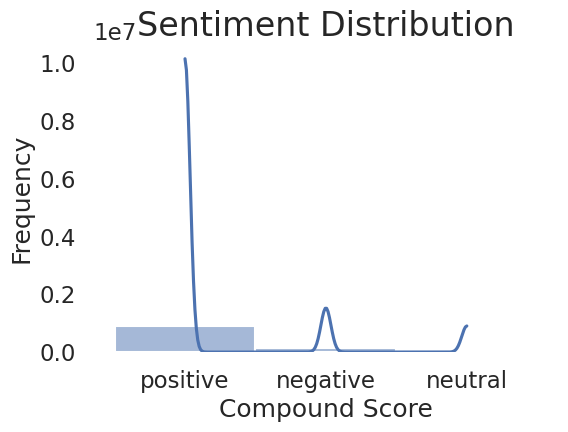

In [ ]:
# Visualise the result

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6,4))

# Use histplot
sns.histplot(x="sentiment_cat",
             data=myData,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02
             )

# Add label to horiztontal axis
ax.set_xlabel("Compound Score")

# Remove ylabel
ax.set_ylabel("Frequency")

# Add a title
ax.set_title("Sentiment Distribution", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

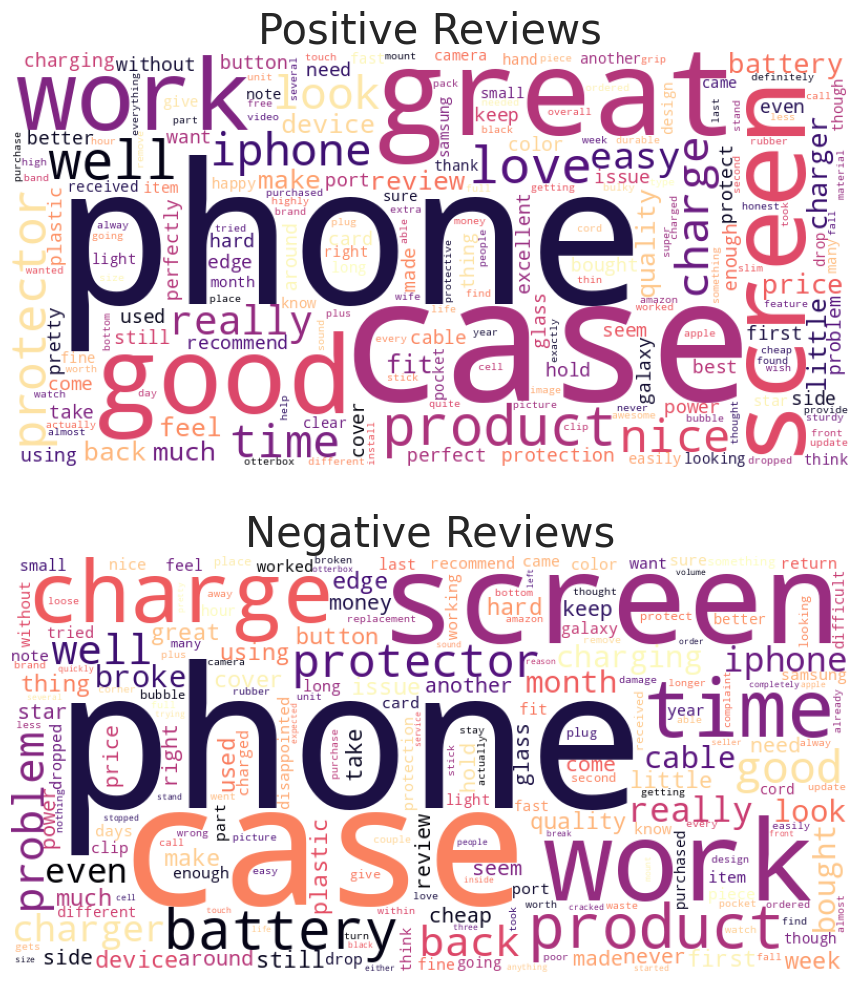

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, ax = plt.subplots(2, 1, figsize=(12,12))

# Generate a word cloud for positive reviews
myCloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='magma'
                       ).generate(myStringPos)

ax[0].imshow(myCloudPos)
ax[0].set_title('Positive Reviews', fontsize=30)
ax[0].set_xlabel('')
ax[0].axis("off")

# Generate a word cloud for negative reviews
myCloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='magma'
                       ).generate(myStringNeg)

ax[1].imshow(myCloudNeg)
ax[1].set_title('Negative Reviews', fontsize=30)
ax[1].set_xlabel('')
ax[1].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# First upload a review data set to the runtime

# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 10000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('Cell_Phones_and_Accessories_5.json', nrows=10000000, lines=True,  chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myData = pd.concat(myList,axis=0)

In [ ]:
# Use regular expression

import re

# Get a bunch of tools from nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Create an empty list to store the cleaned reviews
cleaned_review = []

# Tidy up the reviews

for review in myData['reviewText'].apply(str):
  # Remove special characters
  review = re.sub("[^a-zA-Z']"," ",review)
  #Remove leading and trailing whitespaces
  review = review.strip()
  #Restrict the length of the string
  if len(review) > 5:
    cleaned_review.append(review)

In [ ]:
# Concatenate all the reviews into a single string
all_review = ' '.join(cleaned_review)

# Tokenise into words
myWords = word_tokenize(all_review)

# Need a dictionary of stop words
en_stopwords = set(stopwords.words('english'))

# Remove stop words
# Only keep words with more than 3 letters
# Lowercase the words
myWords_noSW_noCase = [word.lower() for word in myWords if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDist = FreqDist(myWords_noSW_noCase)

# Take a look
fDist.most_common(20)

[('phone', 707556),
 ('case', 641960),
 ('great', 321306),
 ('screen', 271831),
 ('like', 243541),
 ('good', 243059),
 ('product', 196491),
 ('well', 194054),
 ('would', 189708),
 ('love', 144780),
 ('works', 142105),
 ('iphone', 132520),
 ('really', 130618),
 ('nice', 129884),
 ('protector', 127547),
 ('battery', 120091),
 ('charge', 117476),
 ('time', 113573),
 ('also', 111342),
 ('easy', 109720)]

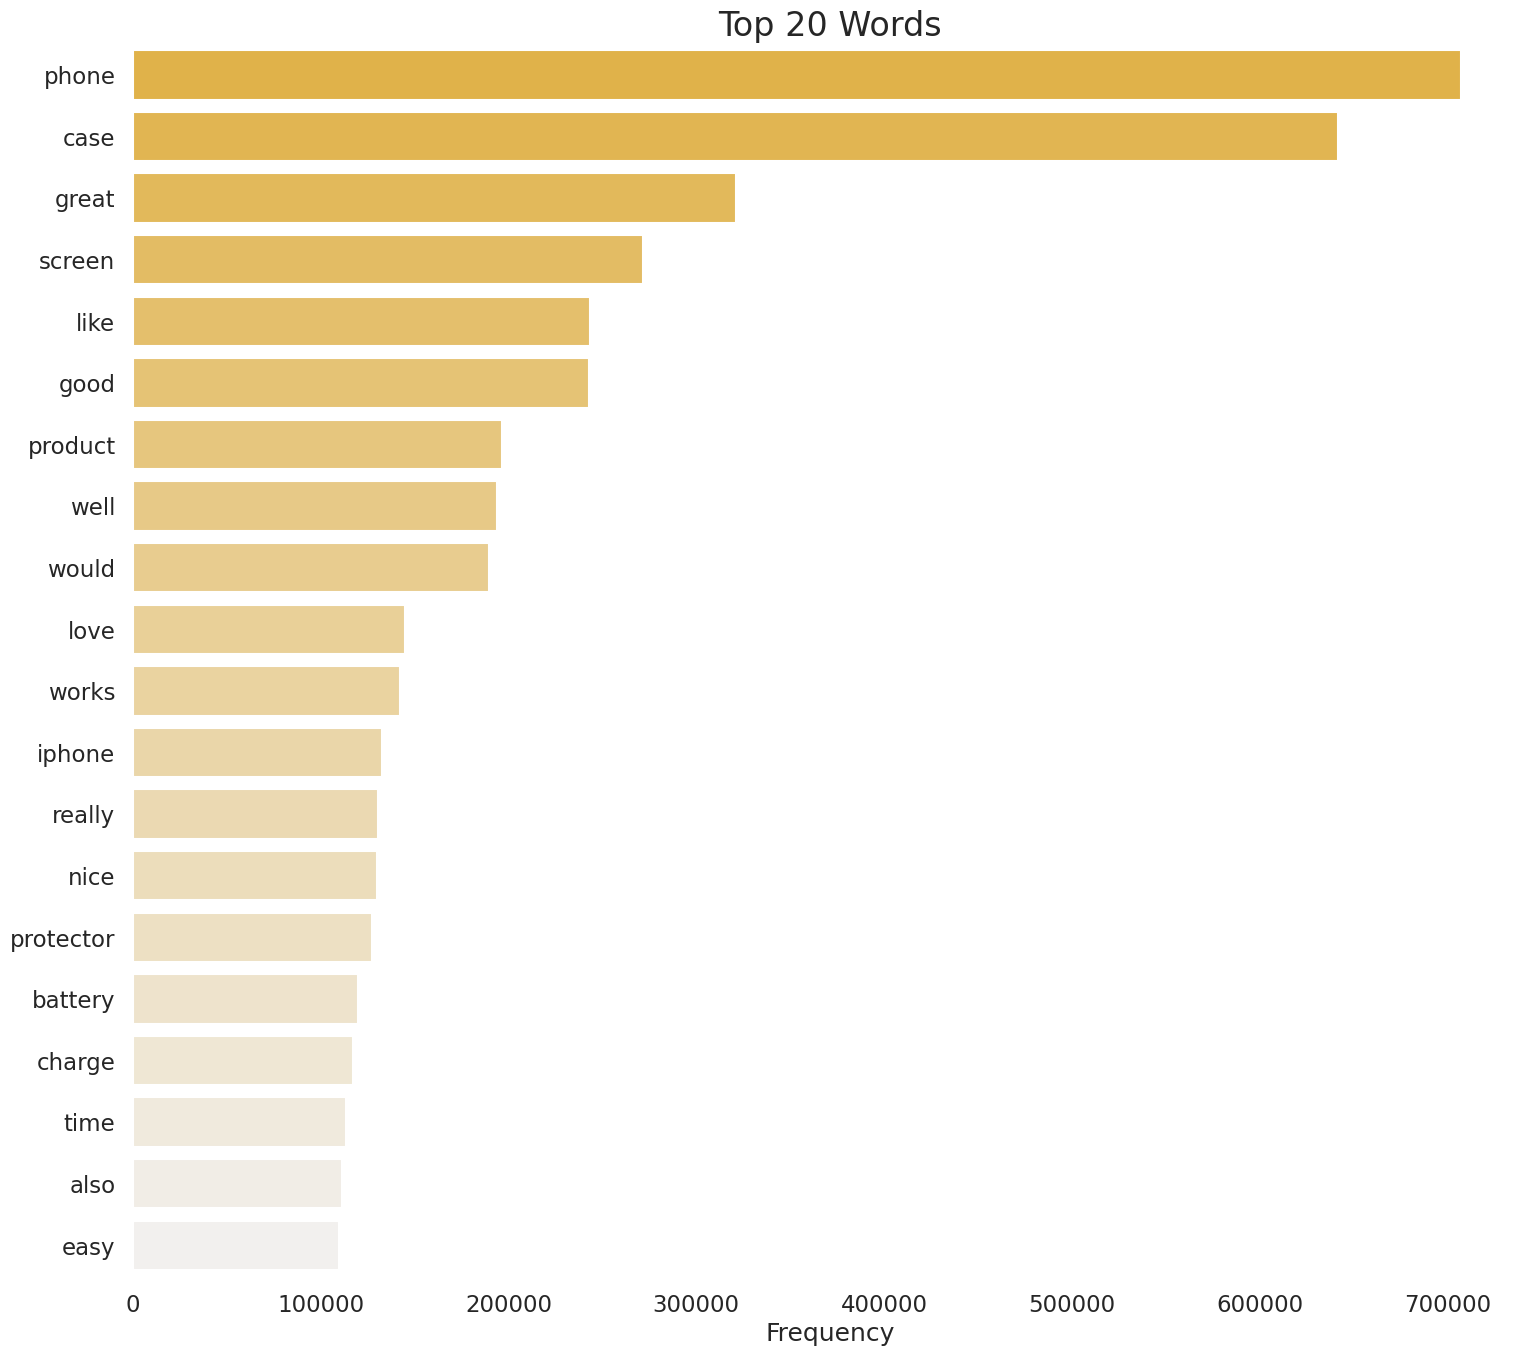

In [ ]:
# Visualise the result

# Convert the result to a dataframe for visualisation
myDF = pd.DataFrame(fDist.most_common(20), columns=['word', 'frequency'])

# Set a more specific style
sns.set_theme(style="white", context="talk")
#sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,16))


# Define the base color as a yellow color in hexadecimal format
baseColor = "#f9bc31"

# Create a palette with 8 shades of the base color, ranging from bright to light
yellowPalette = sns.light_palette(baseColor, n_colors=20, reverse=True)

# x and y will control if the barplot is horizontal or vertical
sns.barplot(x="frequency",
            y="word",
            data=myDF,
            palette=yellowPalette  # Use the yellow color palette
            )

# Add label to horiztontal axis
ax.set_xlabel("Frequency")

# Remove ylabel
ax.set_ylabel("")

# Add a title
ax.set_title("Top 20 Words", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("top20.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()